In [3]:
import sys
import os


sys.path.insert(0, os.path.abspath(os.path.join(os.path.dirname('__file__'), '..')))
from parton_splittings import *

f_sol = np.load("saved_files/fsol_t=1.845_E=100.0GeV_q=1.5_z=0.3.npy")
sis = phsys(100, 0.3, 1.5, 1.5) #E, z, qF, Medium size (grid)
sis.set_dim(32,32,32,32) #Grid dimensions
sis.set_fsol(f_sol)
sis.set_t(1.845)

print(sis.V1)
fit = torch.load("saved_fits/fit_example.pth", weights_only=False)
fit.eval()

[-0.75       -0.7016129  -0.65322581 -0.60483871 -0.55645161 -0.50806452
 -0.45967742 -0.41129032 -0.36290323 -0.31451613 -0.26612903 -0.21774194
 -0.16935484 -0.12096774 -0.07258065 -0.02419355  0.02419355  0.07258065
  0.12096774  0.16935484  0.21774194  0.26612903  0.31451613  0.36290323
  0.41129032  0.45967742  0.50806452  0.55645161  0.60483871  0.65322581
  0.7016129   0.75      ]


simple_fitter(
  (layers): Sequential(
    (0): Linear(in_features=4, out_features=64, bias=True)
    (1): ReLU()
    (2): Linear(in_features=64, out_features=128, bias=True)
    (3): ReLU()
    (4): Linear(in_features=128, out_features=256, bias=True)
    (5): ReLU()
    (6): Linear(in_features=256, out_features=64, bias=True)
    (7): ReLU()
    (8): Linear(in_features=64, out_features=2, bias=True)
  )
)

In [4]:
Theta = np.arange(0.01, 0.12, 0.02)
Fp_an  = .0 * Theta
Fp_sim = .0 * Theta

#torch.cuda.empty_cache()
for th in range(len(Theta)):
    fp = np.real(fasit2Ncdiagint(sis.t, sis.omega*Theta[th], 0, sis.z, sis.omega, sis.Omega, sis.qhat))

    print("Computing theta = ", Theta[th])
    U1 = np.linspace(-sis.L/2, sis.L/2, 256)
    U2 = np.linspace(-sis.L/2, sis.L/2, 256)
    V1 = np.linspace(-sis.L/2, sis.L/2, 64)
    V2 = np.linspace(-sis.L/2, sis.L/2, 64)

    Fp_prime = compute_fourier_torch_chunks(fit, U1, U2, V1, V2, sis.omega*Theta[th], 0, sis.beta(sis.t), chunksize_U1=16,  chunksize_U2=8).cpu().detach().numpy()

    #Fp_prime = np.real(compute_fourier(sis.Fsol, sis.beta(sis.t), sis.U1, sis.U2, sis.V1, sis.V2, sis.omega*Theta[th], 0))

    Fp_an[th] = fp
    Fp_sim[th] = Fp_prime

    print("Analytical = ", fp)
    print("Simulation = ", Fp_prime)

# for th in range(8, len(Theta)):
#     fp = np.real(fasit2Ncdiagint(sis.t, sis.omega*Theta[th], 0, sis.z, sis.omega, sis.Omega, sis.qhat))

#     print("Computing theta = ", Theta[th])
#     U1 = np.linspace(-sis.L/2, sis.L/2, 1024)
#     U2 = np.linspace(-sis.L/2, sis.L/2, 1024)
#     V1 = np.linspace(-sis.L/4, sis.L/4, 64)
#     V2 = np.linspace(-sis.L/4, sis.L/4, 64)

#     Fp_prime = compute_fourier_torch_chunks(fit, U1, U2, V1, V2, sis.omega*Theta[th], 0, sis.beta(sis.t), chunksize_U1=16,
#       chunksize_U2=16).cpu().detach().numpy()

#     #Fp_prime = compute_fourier(sis.Fsol, sis.beta(sis.t), sis.U1, sis.U2, sis.V1, sis.V2, sis.omega*Theta[th], 0)

#     Fp_an[th] = fp
#     Fp_sim[th] = Fp_prime

#     print("Analytical = ", fp)
#     print("Simulation = ", Fp_prime)

Computing theta =  0.01
Chunk  1  computed
Chunk  2  computed
Chunk  3  computed
Chunk  4  computed
Chunk  5  computed
Chunk  6  computed
Chunk  7  computed
Chunk  8  computed
Chunk  9  computed
Chunk  10  computed
Chunk  11  computed
Chunk  12  computed
Chunk  13  computed
Chunk  14  computed
Chunk  15  computed
Chunk  16  computed
Chunk  17  computed
Chunk  18  computed
Chunk  19  computed
Chunk  20  computed
Chunk  21  computed
Chunk  22  computed
Chunk  23  computed
Chunk  24  computed
Chunk  25  computed
Chunk  26  computed
Chunk  27  computed
Chunk  28  computed
Chunk  29  computed
Chunk  30  computed
Chunk  31  computed
Chunk  32  computed
Chunk  33  computed
Chunk  34  computed
Chunk  35  computed
Chunk  36  computed
Chunk  37  computed
Chunk  38  computed
Chunk  39  computed
Chunk  40  computed
Chunk  41  computed
Chunk  42  computed
Chunk  43  computed
Chunk  44  computed
Chunk  45  computed
Chunk  46  computed
Chunk  47  computed
Chunk  48  computed
Chunk  49  computed
Chunk

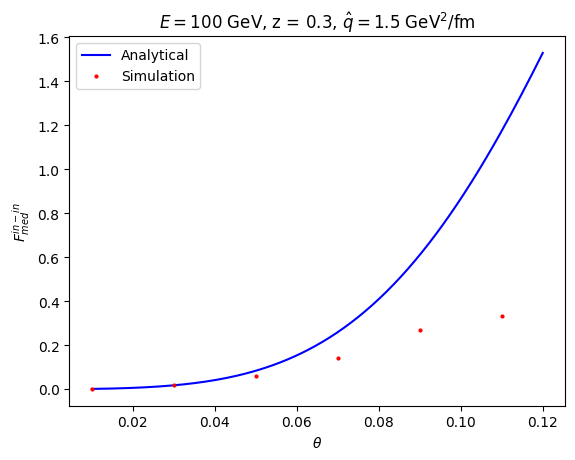

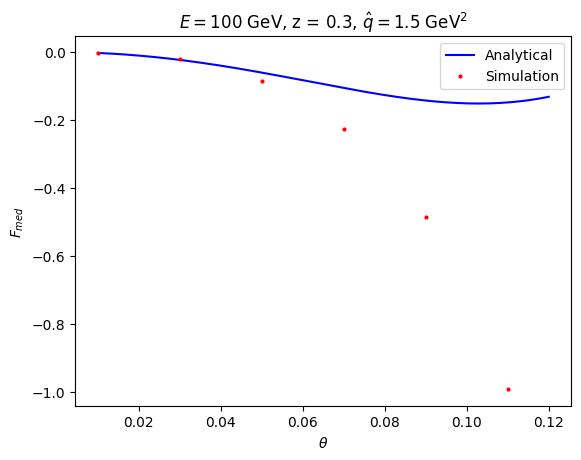

In [6]:
F_INOUT = .0 * Theta
for th in range(len(Theta)):
    F_INOUT[th] = sis.F_in_out(Theta[th])

THETA_1 = np.linspace(0.01, 0.12, 128)
F_INOUT_1 = .0 * THETA_1
Fp_an = THETA_1 * .0
for th in range(len(THETA_1)):
    Fp_an[th] = np.real(fasit2Ncdiagint(sis.t, sis.omega*THETA_1[th], 0, sis.z, sis.omega, sis.Omega, sis.qhat))
    F_INOUT_1[th] = sis.F_in_out(THETA_1[th])

plt.plot(THETA_1, THETA_1**2 / 2 * Fp_an, color = "blue", label = "Analytical")
plt.plot(Theta, Theta**2 / 2 * Fp_sim, "o", markersize = 2, color = "red", label = "Simulation")
plt.ylabel(r"$F_{med}^{in-in}$")
plt.xlabel(r"$\theta$")
plt.title(r"$E = 100$ GeV, z = $0.3$, $\hat{q} = 1.5$ GeV$^2$/fm")
plt.legend()
plt.show()

plt.plot(THETA_1, THETA_1**2 / 2 * Fp_an + F_INOUT_1, color = "blue", label = "Analytical")
plt.plot(Theta, Theta**2 / 2 * Fp_sim + F_INOUT, "o", markersize = 2, color = "red", label = "Simulation")
plt.ylabel(r"$F_{med}$")
plt.xlabel(r"$\theta$")
plt.title(r"$E = 100$ GeV, z = $0.3$, $\hat{q} = 1.5$ GeV$^2$")
plt.legend()



In [21]:
print(sis.beta(sis.t))

5.730552099987822
